In [40]:
from numpy import *
from matplotlib.pyplot import *
from scipy.linalg import *
from scipy.stats import norm as nd  # normal distribution

In [27]:
def QM(K,f,n=64,a=0,b=1):
    j = arange(n)+1
    t = a+(b-a)*(j-0.5)/n
    s = t
    w = (b-a)/n
    A = zeros([n,n])
    for i in range(n):
        for j in range(n):
            A[i,j] = w * K(s[i],t[j])
    x = zeros(n)
    for i in range(n):
        x[i] = f(t[i])
    b = A@x
    
    return A,x,b

In [34]:
def gravity(n,example,a,b,d):
    def K(s,t):
        return d*pow(d**2+(s-t)**2,-3/2)
    def f(t):
        if example ==1:
            return sin(pi*t)+0.5*sin(2*pi*t)
    A,x,b = QM(K,f,n,a,b)
    return A,b,x

In [4]:
def shaw(n):
    def K(s,t):
        u = pi*(sin(s)+sin(t))
        if u ==0:
            return (cos(s)+cos(t))**2
        else:
            return ((cos(s)+cos(t))*(sin(u)/u))**2
    def f(t):
        a1,a2,c1,c2,t1,t2 = 2,1,6,2,0.8,-0.5
        return a1*exp(-c1*(t-t1)**2) + a2*exp(-c2*(t-t2)**2)
        
    A,x,b = QM(K,f,n=n,a=-pi/2,b=pi/2)
                        
    return A,b,x

In [5]:
def picard(u,s,b):
    n = len(s)
    i = arange(n)
    uTb = abs(u[i].T@b)
    uTb_s = uTb[i]/s[i]
    plot(i,s,'b-s',label='$\sigma_i$')
    plot(i,uTb,'r-x',mfc='none',label='$|u_i^T b|$')
    plot(i,uTb_s,'y-o',mfc='none',label='$|u_i^T b|/\sigma_i$')
    yscale('log')
    legend(loc='lower left')
    title('Picard Plot')

# Tests

## gravity test

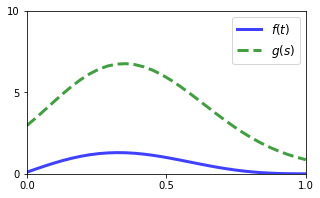

In [35]:
A,b,x = gravity(n=32,example=1,a=0,b=1,d=0.25)
t = linspace(0,1,32)
figure(figsize=(5,3))
plot(t,x,'b-',label='$f(t)$',lw=3,alpha=0.75); plot(t,b,'g--',label='$g(s)$',lw=3,alpha=0.75); xlim(0,1), ylim(0,10); 
legend(fontsize=12); xticks([0,0.5,1]); yticks([0,5,10]);

In [41]:
b_wn = b + 1e-3*nd.rvs(size=32)

In [37]:
u,s,vh = svd(A)

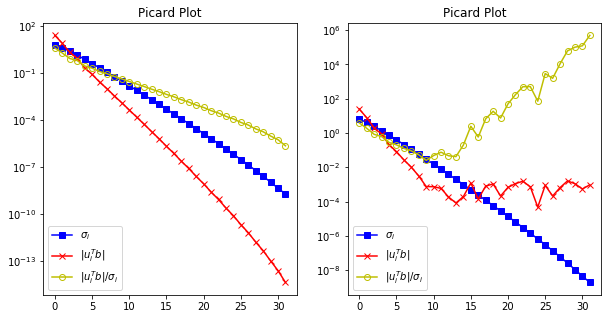

In [44]:
figure(figsize=(10,5))
subplot(121); picard(u,s,b); subplot(122); picard(u,s,b_wn);

## shaw test

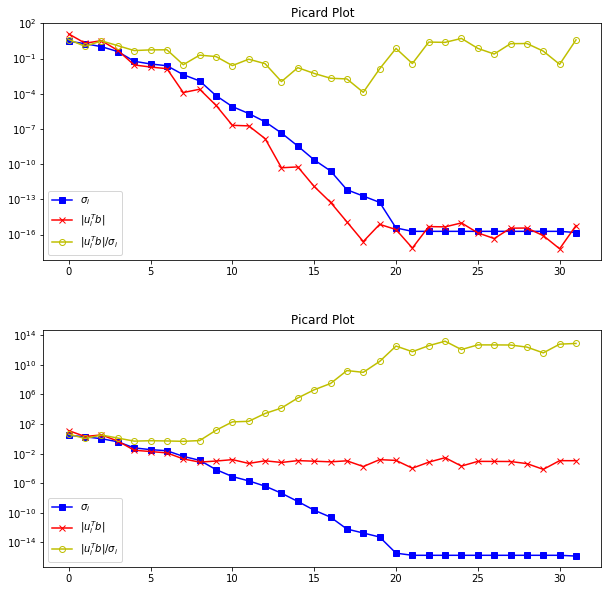

In [5]:
n = 32
A,b_bar,x = shaw(n)
e = 1e-3*norm.rvs(size=n); b = b_bar + e;
u,s,vh = svd(A)
figure(figsize=(10,10))
subplots_adjust(hspace=0.3)
subplot(211); picard(u,s,b_bar);
subplot(212); picard(u,s,b);

## CGLS

<img src = 'cgls.png' style ='float:left;width:300px'>

In [48]:
from scipy.linalg import norm
from scipy.stats import norm as normal

In [6]:
n = 128
A,b,x1 = shaw(n)

In [7]:
def cgls(A,b,k):
    n = len(b)
    x = zeros([n,k]); r = zeros([n,k]); d = zeros([n,k]);
    r[:,0] = b - A@x[:,0]
    d[:,0] = A.T@r[:,0]
    for i in range(k-1):
        al = (norm(A.T@r[:,i])**2) / (norm(A@d[:,i])**2)
        x[:,i+1] = x[:,i] + al*d[:,i]
        r[:,i+1] = r[:,i] - al*A@d[:,i]
        be = (norm(A.T@r[:,i+1])**2) / (norm(A.T@r[:,i])**2)
        d[:,i+1] = A.T@r[:,i+1] + be*d[:,i]
    return x

In [85]:
b_wn = b + normal.rvs(size=n)*3e-2

In [86]:
k=13
x = cgls(A,b_wn,k)

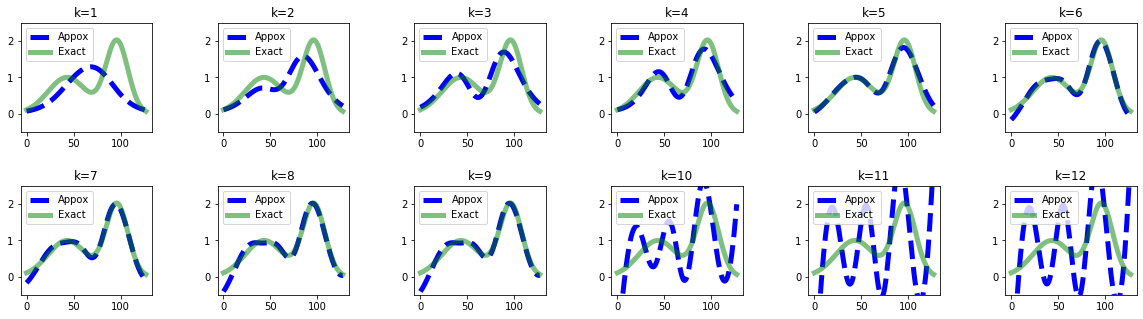

In [87]:
fig, ax = subplots(2,6,figsize=(20,5))
fig.subplots_adjust(hspace = .5, wspace=.5)
ax = ax.ravel()   # (2,6) -> (12,)    
for i in range(k-1):
    ax[i].plot(x[:,i+1],'b--',lw=5,label='Appox'); ax[i].plot(x1,'g-',lw=5,alpha=0.5,label='Exact'); ax[i].set_title('k=%d'%(i+1));
    ax[i].set_ylim(-0.5,2.5)
    ax[i].legend(loc='upper left');